In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Banknote-authentication-dataset-simplyfied.csv")

data

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [81]:
# Normalized dataset

norm_data = (data - data.min())/(data.max()-data.min())

norm_mean = [ norm_data['V1'].mean(), norm_data['V2'].mean() ]
norm_std = [ norm_data['V1'].std(), norm_data['V2'].std() ]

print("Mean: ", norm_mean, "Std dev: ", norm_std)

Mean:  [0.5391136632764807, 0.5873013774145737] Std dev:  [0.20500346769971411, 0.2196113237409729]


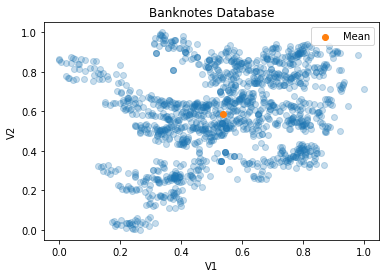

In [94]:
plt.xlabel('V1')
plt.ylabel('V2')
plt.scatter(norm_data['V1'], norm_data['V2'], alpha=0.25)
plt.scatter(norm_mean[0], norm_mean[1], label="Mean")

plt.title("Banknotes Database")
plt.legend()
plt.show()

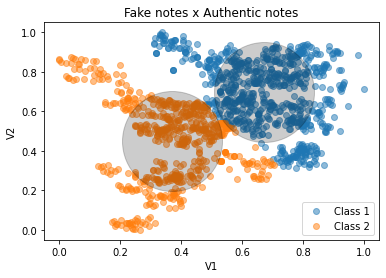

In [115]:
# Using K_means
from sklearn.cluster import KMeans

for i in range(1):
    kmeans = KMeans(n_clusters=2).fit(norm_data)
    
    # Calculating the centres of our clusters
    clusters = kmeans.cluster_centers_

    # Mask with the classification of the elements
    y_kmeans = kmeans.predict(norm_data)

    #print(clusters)

    # Create a column with the labels

    norm_data['Class'] = y_kmeans

    class_1 = norm_data[ norm_data['Class'] == 0 ]
    class_2 = norm_data[ norm_data['Class'] == 1 ]

    # Plotting with two clusters
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.scatter(class_1['V1'], class_1['V2'], label="Class 1", alpha=0.5)
    plt.scatter(class_2['V1'], class_2['V2'], label="Class 2", alpha=0.5)

    plt.scatter(clusters[:,0], clusters[:,1], c='black', s=10000, alpha=0.2)

    plt.title("Fake notes x Authentic notes")
    plt.legend()
    plt.show()

### Discussion
With our data of banknotes already normalized, now we can use the KMean algorithm and it will find the two clusters for us, giving a list of which of our elements belong to which class. We can then add a label column into our table, and now print out our grapic again with different colours and see the two classes. If you run the code several times, there are little changes in the position of the centroids, but they change very slightly. Using this model now we can classify any new data into *Class 1* or *Class 2*.

In [60]:
pd.set_option('display.max_rows', 1000)
print(y_kmeans)

[1 1 1 ... 0 0 0]
